## **E‑commerce Product Category Recommendation System**

Notebook ini membangun sistem rekomendasi **kategori produk** untuk platform e‑commerce.  
Tujuannya adalah menganalisis profil pengguna dan memberikan saran kategori produk yang relevan berdasarkan kemiripan preferensi antar pengguna.

## **Deskripsi Dataset**

Dataset `user_personalized_features.csv` berisi 1000 pengguna dengan informasi:

- Data demografis: `Age`, `Gender`, `Location`, `Income`.
- Perilaku belanja: `Last_Login_Days_Ago`, `Purchase_Frequency`,
  `Average_Order_Value`, `Total_Spending`, `Time_Spent_on_Site_Minutes`, `Pages_Viewed`.
- Preferensi: `Interests` (minat utama) dan `Product_Category_Preference`
  (kategori produk favorit).
- `Newsletter_Subscription` menunjukkan apakah pengguna berlangganan newsletter.

Proyek ini fokus pada kolom **Interests** dan **Product_Category_Preference** untuk membangun profil preferensi pengguna.


In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics.pairwise import cosine_similarity

In [27]:
import sklearn
import imblearn
import category_encoders
import matplotlib
import streamlit
import sklearn


In [28]:
pip install streamlit==1.46.0

Note: you may need to restart the kernel to use updated packages.


In [29]:
print("numpy==", np.__version__) # versi numpy
print("pandas==", pd.__version__) # versi pandas 
print("matplotlib==", matplotlib.__version__) # versi matplotlib
print("seaborn==", sns.__version__) # versi seaborn 
print("streamlit==", streamlit.__version__) # versi streamlit
print("scikit-learn==", sklearn.__version__) # versi scikitlearn


numpy== 1.26.4
pandas== 2.2.3
matplotlib== 3.8.4
seaborn== 0.13.2
streamlit== 1.46.0
scikit-learn== 1.5.1


In [30]:
path = "D:\\Purwadhika\\Portofolio\\Portofolio 3\\user_personalized_features.csv"
df = pd.read_csv(path)
df


,Unnamed: 0,User_ID,Age,Gender,Location,Income,Interests,Last_Login_Days_Ago,Purchase_Frequency,Average_Order_Value,Total_Spending,Product_Category_Preference,Time_Spent_on_Site_Minutes,Pages_Viewed,Newsletter_Subscription
0,0,#1,56,Male,Suburban,38037,Sports,5,7,18,2546,Books,584,38,True
1,1,#2,46,Female,Rural,103986,Technology,15,7,118,320,Electronics,432,40,False
2,2,#3,32,Female,Suburban,101942,Sports,28,1,146,3766,Apparel,306,1,True
3,3,#4,60,Female,Suburban,71612,Fashion,18,3,163,4377,Apparel,527,29,False
4,4,#5,25,Male,Suburban,49725,Travel,2,5,141,4502,Health & Beauty,53,10,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,#996,22,Male,Urban,104162,Technology,18,7,83,607,Apparel,542,21,False
996,996,#997,40,Male,Urban,99003,Travel,16,3,180,431,Apparel,359,4,True
997,997,#998,27,Female,Urban,72395,Technology,8,8,130,650,Books,331,34,False
998,998,#999,61,Male,Rural,59758,Travel,1,3,152,1041,Electronics,427,28,True


In [31]:
# Hapus kolom index yang tidak perlu
df = df.drop(columns=['Unnamed: 0'], errors='ignore')

df.head()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   User_ID                      1000 non-null   object
 1   Age                          1000 non-null   int64 
 2   Gender                       1000 non-null   object
 3   Location                     1000 non-null   object
 4   Income                       1000 non-null   int64 
 5   Interests                    1000 non-null   object
 6   Last_Login_Days_Ago          1000 non-null   int64 
 7   Purchase_Frequency           1000 non-null   int64 
 8   Average_Order_Value          1000 non-null   int64 
 9   Total_Spending               1000 non-null   int64 
 10  Product_Category_Preference  1000 non-null   object
 11  Time_Spent_on_Site_Minutes   1000 non-null   int64 
 12  Pages_Viewed                 1000 non-null   int64 
 13  Newsletter_Subscription      1000 

## **Exploratory Data Analysis (EDA)**

Bagian ini mengeksplorasi karakteristik utama pengguna:

- Distribusi usia dan pendapatan untuk melihat segmen pelanggan.
- Kategori produk yang paling sering menjadi preferensi.
- Sebaran minat (`Interests`) untuk memahami tema produk yang dominan.

Insight dari EDA akan membantu menjelaskan hasil rekomendasi di bagian berikutnya.

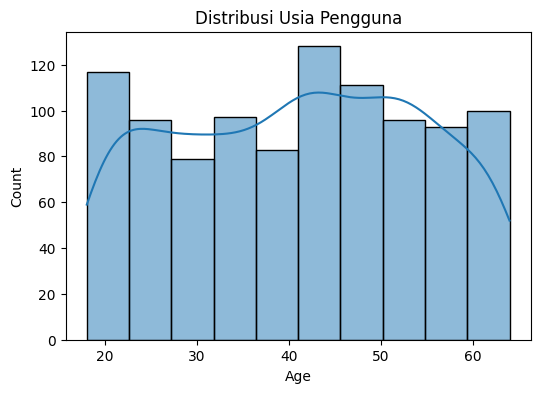

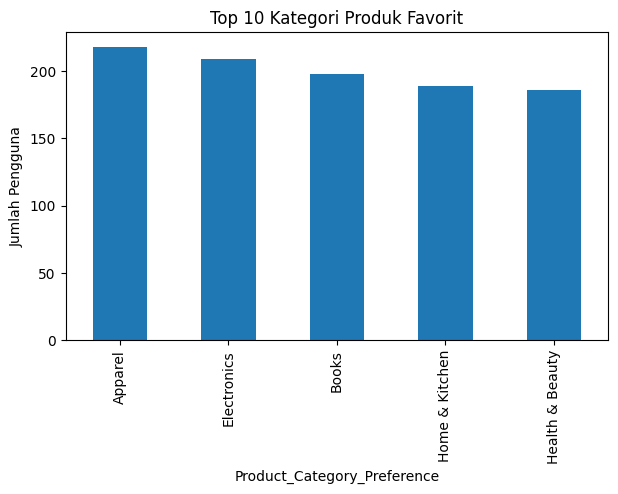

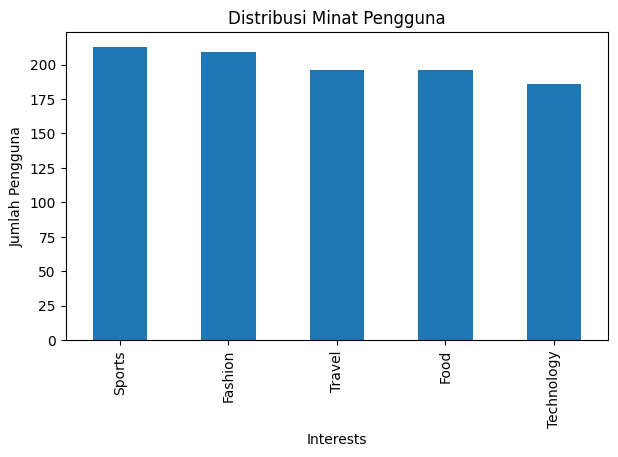

In [32]:
# Distribusi usia
plt.figure(figsize=(6,4))
sns.histplot(df['Age'], bins=10, kde=True)
plt.title("Distribusi Usia Pengguna")
plt.show()

# Top kategori produk favorit
plt.figure(figsize=(7,4))
df['Product_Category_Preference'].value_counts().head(10).plot(kind='bar')
plt.title("Top 10 Kategori Produk Favorit")
plt.ylabel("Jumlah Pengguna")
plt.show()

# Distribusi minat
plt.figure(figsize=(7,4))
df['Interests'].value_counts().plot(kind='bar')
plt.title("Distribusi Minat Pengguna")
plt.ylabel("Jumlah Pengguna")
plt.show()

In [33]:
df[['Income','Total_Spending','Average_Order_Value']].describe()

,Income,Total_Spending,Average_Order_Value
count,1000.000000,1000.000000,1000.000000
mean,81304.732000,2552.957000,104.039000
std,37363.972753,1420.985048,54.873569
min,20155.000000,112.000000,10.000000
25%,48715.500000,1271.750000,58.000000
50%,81042.000000,2542.000000,105.000000
75%,112694.500000,3835.500000,150.000000
max,149951.000000,4999.000000,199.000000


Dari grafik terlihat bahwa mayoritas pengguna berada pada rentang usia 25–45 tahun dan kategori **Apparel**, **Electronics**, serta **Books** mendominasi preferensi produk. Hal ini mengindikasikan fokus platform pada kebutuhan sehari‑hari dan hiburan.

## **Pemilihan Fitur & Perhitungan Kemiripan Pengguna**

Untuk menyederhanakan proyek, sistem rekomendasi dibangun dari dua fitur:

- `Interests` → menggambarkan minat utama pengguna (Sports, Technology, Fashion, dll.).
- `Product_Category_Preference` → kategori produk yang paling sering dipilih.

Kedua fitur dikonversi menjadi vektor biner menggunakan **One‑Hot Encoding**,  
kemudian kemiripan antar pengguna dihitung dengan **cosine similarity**.

Nilai similarity 1 menunjukkan profil yang identik, sedangkan nilai mendekati 0
menunjukkan pengguna dengan preferensi yang sangat berbeda.


In [34]:
# Pilih fitur kategorikal untuk profil user
cat_features = ['Interests', 'Product_Category_Preference']

encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded = encoder.fit_transform(df[cat_features])

encoded_df = pd.DataFrame(encoded, index=df['User_ID'])
encoded_df.head()

,0,1,2,3,4,5,6,7,8,9
User_ID,,,,,,,,,,
#1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
#2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
#3,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
#4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
#5,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [35]:
# Hitung cosine similarity antar user
user_similarity = cosine_similarity(encoded_df)
user_similarity_df = pd.DataFrame(
    user_similarity,
    index=encoded_df.index,
    columns=encoded_df.index
)

user_similarity_df.iloc[:5, :5]

User_ID,#1,#2,#3,#4,#5
User_ID,,,,,
#1,1.0,0.0,0.5,0.0,0.0
#2,0.0,1.0,0.0,0.0,0.0
#3,0.5,0.0,1.0,0.5,0.0
#4,0.0,0.0,0.5,1.0,0.0
#5,0.0,0.0,0.0,0.0,1.0


## **Fungsi Sistem Rekomendasi**

Sistem rekomendasi menggunakan pendekatan **user‑based collaborative filtering**:

1. Untuk satu `User_ID`, dicari beberapa pengguna lain dengan nilai similarity tertinggi.
2. Dari kelompok tetangga tersebut, diambil kategori produk favorit mereka.
3. Kategori yang paling sering muncul dijadikan sebagai rekomendasi utama
   untuk pengguna target.

Fungsi `recommend_top_categories_for_user()` mengembalikan daftar kategori
yang direkomendasikan lengkap dengan jumlah tetangga dan proporsi kemunculannya.

In [36]:
from collections import Counter

def recommend_top_categories_for_user(user_id, df_users, sim_df,
                                      top_k_neighbors=5, top_n_cats=3):
    """
    Menghasilkan daftar kategori produk yang direkomendasikan untuk satu user
    berdasar kategori favorit user-user lain yang paling mirip.
    """
    if user_id not in sim_df.index:
        return pd.DataFrame()
    
    # similarity ke semua user lain
    sims = sim_df.loc[user_id].drop(user_id, errors="ignore")
    neighbors = sims.sort_values(ascending=False).head(top_k_neighbors)
    neighbor_ids = neighbors.index
    
    # kategori favorit tetangga
    neighbor_rows = df_users[df_users['User_ID'].isin(neighbor_ids)]
    cats = neighbor_rows['Product_Category_Preference']
    
    if cats.empty:
        return pd.DataFrame()
    
    counts = Counter(cats)
    total = sum(counts.values())
    
    data = []
    for cat, cnt in counts.most_common(top_n_cats):
        data.append({
            "Category": cat,
            "Neighbor_Count": cnt,
            "Proportion": round(cnt / total, 3)
        })
    
    return pd.DataFrame(data)

## **Menjelaskan Rekomendasi (Explainability)**

Agar rekomendasi lebih mudah dipahami, fungsi `explain_recommendation()`
menampilkan daftar pengguna tetangga paling mirip beserta:

- `User_ID`, `Age`, `Gender`, `Interests`
- `Product_Category_Preference`
- nilai `Similarity` terhadap pengguna target

Dari tabel ini dapat dilihat bahwa kategori yang direkomendasikan memang dominan
di antara pengguna dengan profil yang mirip.

In [37]:
def explain_recommendation(user_id, df_users, sim_df, top_k_neighbors=5):
    """
    Mengembalikan daftar user tetangga paling mirip beserta
    similarity score dan kategori favorit mereka.
    """
    if user_id not in sim_df.index:
        return pd.DataFrame()
    
    sims = sim_df.loc[user_id].drop(user_id, errors="ignore")
    neighbors = sims.sort_values(ascending=False).head(top_k_neighbors)
    neighbor_ids = neighbors.index
    
    neighbor_rows = df_users[df_users['User_ID'].isin(neighbor_ids)].copy()
    neighbor_rows = neighbor_rows[['User_ID','Age','Gender','Interests',
                                   'Product_Category_Preference']]
    neighbor_rows['Similarity'] = neighbor_rows['User_ID'].map(neighbors)
    return neighbor_rows.sort_values('Similarity', ascending=False)

## **Contoh Rekomendasi dan Interpretasi**

Bagian ini menampilkan contoh hasil rekomendasi untuk satu pengguna dan
menjelaskan dari mana rekomendasi tersebut berasal.


In [38]:
sample_user = df['User_ID'].iloc[0]
print("Sample user:", sample_user)

rec_df = recommend_top_categories_for_user(sample_user, df, user_similarity_df)
display(rec_df)

explain_df = explain_recommendation(sample_user, df, user_similarity_df)
display(explain_df)


Sample user: #1


,Category,Neighbor_Count,Proportion
0,Books,5,1.0


,User_ID,Age,Gender,Interests,Product_Category_Preference,Similarity
213,#214,36,Male,Sports,Books,1.0
456,#457,39,Male,Sports,Books,1.0
464,#465,22,Male,Sports,Books,1.0
516,#517,19,Female,Sports,Books,1.0
828,#829,21,Male,Sports,Books,1.0


In [39]:
rec_df.to_csv(f"sample_{sample_user}_recommended_categories.csv", index=False)
explain_df.to_csv(f"sample_{sample_user}_neighbors_explanation.csv", index=False)

Pada contoh `User_ID = #1`, sistem merekomendasikan kategori **Books**.
Hal ini konsisten dengan tabel tetangga, di mana mayoritas pengguna dengan
similarity tertinggi juga memiliki `Product_Category_Preference = Books`.

Artinya, user #1 dikelilingi oleh pengguna dengan minat dan kategori yang sama,
sehingga saran kategori Books dapat dianggap wajar.

## **Ekspor Data untuk Aplikasi**

Data pengguna yang sudah dibersihkan (`users_clean.csv`) dan matriks kemiripan
pengguna (`user_similarity.csv`) disimpan agar dapat digunakan kembali
pada aplikasi Streamlit.

In [40]:
df.to_csv("users_clean.csv", index=False)
user_similarity_df.to_csv("user_similarity.csv")

In [41]:
pip freeze > requirements.txt

Note: you may need to restart the kernel to use updated packages.
